# Introduction to Python - Lecture 09 (31Oct 2018)

### Agenda for today:
+ Introduction to Pandas
+ Introduction to Seaborn

#### Recap

In [2]:
import numpy as np
lst = np.array(
      [[ 1,  1],
       [ 4,  3],
       [ 0,  1],
       [-1,  1],
       [ 0,  1],
       [ 4, -2],
       [-5,  1],
       [-1,  0],
       [-3,  3],
       [ 3,  3]])

#### How do you return the first column? [1, 4, 0, -1, 0, 4, -5, -1, -3, 3]

In [3]:
lst[:, 0]

array([ 1,  4,  0, -1,  0,  4, -5, -1, -3,  3])

#### How do you return the second column? [1, 3, 1, 1, 1, -2, 1, 0, 3, 3]

In [4]:
lst[:, 1]

array([ 1,  3,  1,  1,  1, -2,  1,  0,  3,  3])

#### How do get the sum of each row?

In [7]:
lst.sum(axis=1)

array([ 2,  7,  1,  0,  1,  2, -4, -1,  0,  6])

#### How can we calculate the z score of each row?

In [16]:
def z_score(row):
    return (row - row.mean()) / row.std()
# np.apply_along_axis(z_score, 0, lst)
# for row in lst:
#     print(z_score(row))
np.apply_along_axis(lambda row: (row - row.mean()) / row.std(), 0, lst)

array([[ 0.28718326, -0.13608276],
       [ 1.3641205 ,  1.22474487],
       [-0.07179582, -0.13608276],
       [-0.4307749 , -0.13608276],
       [-0.07179582, -0.13608276],
       [ 1.3641205 , -2.17732422],
       [-1.86669121, -0.13608276],
       [-0.4307749 , -0.81649658],
       [-1.14873305,  1.22474487],
       [ 1.00514142,  1.22474487]])

---

### Setting a lower bound using numpy

You can find all values that match a criteria us comparison operations

**eg**
```python
lst = np.arange(0, 20)
lst < 5
```

+ This will return an array with 20 elements, the first 5 will be True, the rest False.
+ We can then use this as the index to the numpy array and set those values to something else
```python
lst = np.arange(0, 20)
lst[lst < 5] = 0
lst
```

In [19]:
lst = np.arange(0, 20)
lst[lst < 5] = 0
lst

array([ 0,  0,  0,  0,  0,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

### On removing noise from images

The method you use to remove noise will vary depending on the type of noise you are trying to remove.

Applying filters to the image is one method of trying to remove noise
+ median filter
+ gaussian filter
+ dilation/erosion

---

## Pandas

Pandas is an external library like numpy and seaborn and needs to be installed using a package manager.

Anaconda:
+ conda install pandas

Pip:
+ pip install pandas

**Note** Seaborn requires pandas as a dependancy, so you should already have it installed.

When we would like to use pandas we need to import it

In [20]:
import numpy as np
import pandas as pd

#### What is a dataframe?

A dataframe is a collection of data where each row consists of a collection of observations.

#### Creating a dataframe

There are many ways to create dataframes:
+ Coverting a dictionary to a dataframe
    ```python
df = pd.Dataframe.from_dict( << dict >> )
    ```
+ Loading the data from a csv file
    ```python
df = pd.read_csv( << csv_path >> )
    ```
+ Load the data from a url
    ```python
url = "https://vincentarelbundock.github.io/Rdatasets/csv/datasets/trees.csv"
df = pd.read_csv(url)
    ```

#### Loading data from a dictionary

Some of these examples are taken from the pandas documentation (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.from_dict.html#pandas.DataFrame.from_dict)

###### By default, each item in the dictionary will represent a column

In [22]:
data = {'col_1': [3, 2, 1, 0], 'col_2': ['a', 'b', 'c', 'd']}
df = pd.DataFrame.from_dict(data)
df

,col_1,col_2
0,3,a
1,2,b
2,1,c
3,0,d


###### This can be changed by changing the orient parameter to 'index' (the default is 'column')

In [23]:
data = {'row_1': [3, 2, 1, 0], 'row_2': ['a', 'b', 'c', 'd']}
pd.DataFrame.from_dict(data, orient='index')

,0,1,2,3
row_1,3,2,1,0
row_2,a,b,c,d


###### The names of the columns can be set using the columns parameter

In [24]:
pd.DataFrame.from_dict(
    data, 
    orient='index',
    columns=['A', 'B', 'C', 'D']
)

,A,B,C,D
row_1,3,2,1,0
row_2,a,b,c,d


###### Alternatively you can specify the column names in the dictionary

In [27]:
data = {
    'Tree1': {'girth': 8.3, 'height': 70, 'volume': 10.3},
    'Tree2': {'girth': 8.6, 'height': 65, 'volume': 10.3},
    'Tree3': {'girth': 8.8, 'height': 63, 'volume': 10.2}
}
pd.DataFrame.from_dict(data, orient='index')

,girth,height,volume
Tree1,8.3,70,10.3
Tree2,8.6,65,10.3
Tree3,8.8,63,10.2


**Note** Each row needs to have a unique identifier, in the above example this is represented by '**Tree#**'. Generally this is represented by an integer ranging from 0->n. 
+ In the above example we can reset the index to be the integers using the reset_index() function.

In [28]:
pd.DataFrame.from_dict(data, orient='index').reset_index()

,index,girth,height,volume
0,Tree1,8.3,70,10.3
1,Tree2,8.6,65,10.3
2,Tree3,8.8,63,10.2


###### Loading Data from a URL

In [29]:
url = "https://vincentarelbundock.github.io/Rdatasets/csv/datasets/trees.csv"
df = pd.read_csv(url)
df.head()

,Unnamed: 0,Girth,Height,Volume
0,1,8.3,70,10.3
1,2,8.6,65,10.3
2,3,8.8,63,10.2
3,4,10.5,72,16.4
4,5,10.7,81,18.8


### Accessing values in the dataframe

In [30]:
data = {
    'Tree1': {'girth': 8.3, 'height': 70, 'volume': 10.3},
    'Tree2': {'girth': 8.6, 'height': 65, 'volume': 10.3},
    'Tree3': {'girth': 8.8, 'height': 63, 'volume': 10.2}
}
df = pd.DataFrame.from_dict(data, orient='index')

#### Columns

+ To get a list of column names you can covert the dataframe into a list
```python
list(df)
```

In [31]:
list(df)

['girth', 'height', 'volume']

+ Access columns using the column name in square brackets to return a series containing the data.
```python
df["column_name"]
```

+ A series is a 1D array of id, value pairs

In [35]:
# df["girth"]
df["girth"].values

array([8.3, 8.6, 8.8])

If instead of passing a single column name you pass a list of column names, a sub dataframe will be returned containing only those columns.

In [38]:
df[["girth", "height"]]#.values

array([[ 8.3, 70. ],
       [ 8.6, 65. ],
       [ 8.8, 63. ]])

#### Rows

Rows are accessed using either **loc** or **iloc**

###### iloc
+ This will access rows depending on their integer index
+ The first row will have index 0
+ Then next will have index 1, ...
+ To extract the first row you would use the following command
    + This will return a series containing the information from that row
```python
df.iloc[0]
```
+ To extract multiple rows you can pass a list of indices
    + This will return a dataframe containing the specified rows
```python
df.iloc[[0, 1, 2]]
```

In [40]:
df.iloc[[2, 1]]

,girth,height,volume
Tree3,8.8,63,10.2
Tree2,8.6,65,10.3


###### loc

Various arguments will work with loc to extract rows from a dataframe

+ A single index label
    + Returns a series for that specific row
    ```python
df.loc["Tree2"]
    ```
+ A list of index labels
    + Returns a dataframe containing those rows
    ```python
df.loc[["Tree1", "Tree3"]]
    ```
+ A boolean list
    + Returns a dataframe for rows that are labeled true
    ```python
df.loc[[False, True]]
    ```

In [45]:
df

,girth,height,volume
Tree1,8.3,70,10.3
Tree2,8.6,65,10.3
Tree3,8.8,63,10.2


In [46]:
df.loc[[False, True, True]]

,girth,height,volume
Tree2,8.6,65,10.3
Tree3,8.8,63,10.2


#### Extracting data by value

Comparison operators can be applied to series objects (which are numpy lists)
For each value it will return either True or False depending on the comparison

**eg**
```console
(1,1,1,5,5,5) > 3
> [False, False, False, True, True, True]
```

This is convinient as **.loc** can use an array of booleans to extract rows.


This allows for specific rows to be extracted from the dataframe depending on their value


In [47]:
df

,girth,height,volume
Tree1,8.3,70,10.3
Tree2,8.6,65,10.3
Tree3,8.8,63,10.2


+ Trees that are shorter than 70
    + df["height"] will return a series
    + df["height"] < 70 will return a list of booleans
        + [False, True, True]
    + We can then use this to extract those rows from the dataframe
    ```python
df.loc[df["height"] < 70]
    ```
    
##### How would you get the rows where the volume is equal to 10.3?

In [50]:
df.loc[df["height"] < 70]

,girth,height,volume
Tree2,8.6,65,10.3
Tree3,8.8,63,10.2


##### Combining conditions

Numpy has various bitwise operations which work on boolean arrays (bitwise operations work on binary sequences, a boolean list is a binary sequence)
+ **&**
    + This is and
    + The resulting list will only be true where both conditions are true
    ```python
l1 = np.array([True, False])
l2 = np.array([True, True])
l1 & l2
    ```
+ |
    + This is or
    + The resulting list will be true where any of the conditions is true
    ```python
l1 = np.array([True, False])
l2 = np.array([True, True])
l1 | l2
    ```
+ ~
    + This is negation
    + The resulting True/False values will be flipped
        ```python
l1 = np.array([True, False])
~l1
    ```
    
**When comparing different conditions with pandas they should be put in parenthesis**
```python
df.loc[(df["something"] > 5) & (df["nothing"] != 4)]
```

In [53]:
l1 = np.array([True, False])

~l1

array([False,  True])

In [54]:
df

,girth,height,volume
Tree1,8.3,70,10.3
Tree2,8.6,65,10.3
Tree3,8.8,63,10.2


###### Using this how can we extract all rows with height < 70 and volume equal to 10.3?

In [59]:
df.loc[(df["height"] < 70) & (df["volume"] == 10.3)]

,girth,height,volume
Tree2,8.6,65,10.3


###### Using this how can we extract all rows except with height < 70 and volume equal to 10.3?


In [62]:
df.loc[~((df["height"] < 70) & (df["volume"] == 10.3))]

,girth,height,volume
Tree1,8.3,70,10.3
Tree3,8.8,63,10.2


#### Loading test datasets

Seaborn has a few test datasets included with it

+ Flights
+ Iris
+ many more (https://github.com/mwaskom/seaborn-data)

These can be accessed using seaborns load_dataset function.
This will return a pandas dataframe containing the data.

```python
df = sns.load_dataset("dataset_name")
```

We will now load the **flights** dataset and perform some analysis on it

In [63]:
import seaborn as sns
df = sns.load_dataset("flights")
df.head() # This will return the first 5 rows of the dataframe

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


#### Extracting rows using strings

Previously when we extracted rows it was using values, this will not work with strings.

+ To extract string values we can use the **isin** function and a list of options
+ Like other comparison operations this will return a list of boolean values
+ This list can be used in conjunction with loc to access rows
```python
df["month"].isin(["January"])
df.loc[df["month"].isin(["January"])]
```
+ As this is a list of booleans it can use the comparrisons we discussed earlier
```python
df.loc[(df["month"].isin(["January"])) & (df["passengers"] > 300)]
```

In [69]:
df.loc[(df["month"].isin(["January"])) & (df["passengers"] > 300)]

,year,month,passengers
96,1957,January,315
108,1958,January,340
120,1959,January,360
132,1960,January,417


In [70]:
list(df)

['year', 'month', 'passengers']

### Groupby

The groupby function of pandas allows you to gather statistics on certain groups within the data.


On its own the groupby function will not actually do anything except create the groups. It needs to be combined with additional functions such as:
+ mean()
+ count()
+ nunique()
+ etc

It is possible to iterate over the groups using for loops, but this is generally not required

As an example we can group all of the flights by month and then sum all of the passengers for each month

In [71]:
df.groupby("month") # This will not do anything except create the group objects

In [74]:
df.groupby(["month"]).count()

,year,passengers
month,,
January,12,12
February,12,12
March,12,12
April,12,12
May,12,12
June,12,12
July,12,12
August,12,12
September,12,12


In [76]:
df[["month", "passengers"]].groupby("month").count()

,passengers
month,
January,12
February,12
March,12
April,12
May,12
June,12
July,12
August,12
September,12


In [78]:
df[["month", "passengers"]].groupby("month").sum()

,passengers
month,
January,2901
February,2820
March,3242
April,3205
May,3262
June,3740
July,4216
August,4213
September,3629


In [79]:
df[["month", "passengers"]].groupby("month").mean()

,passengers
month,
January,241.750000
February,235.000000
March,270.166667
April,267.083333
May,271.833333
June,311.666667
July,351.333333
August,351.083333
September,302.416667


##### How would we calculate which year had the most passengers?

In [92]:
gb = df[["year", "passengers"]].groupby("year").sum()#.max()
gb.loc[gb["passengers"] == gb.max().values[0]]

,passengers
year,
1960,5714


Melting Data / Gathering data

Data can be represented in two different forms:
+ Long
  + The flights data used previously would be an example of long data
  + Each row only contains a single value (passengers)
  + Long format is great for plotting data
+ Wide
  + Wide data contains multiple values per row
  + For example using the flights data:
    + each row could represent a year, each column a month
  + This format is sometimes easier for performing calculations
  + Often it is easier to store data in this format
  
Long data can be converted into wide data using the **pivot** function.

Pivot can take three arguments:
+ index
  + which column should act as the index (remember index values should be unique)
+ columns
  + which column should be split into multiple columns
+ values
  + which column should act as the values 

To convert the flights dataset both year and month could act as the index and columns interchangeably.
+ if index="year"
    + each year will be a row
+ if index="month"
    + each month will be a row
+ vice versa for the column

The value will always be set to passengers

```python
df_wide = df.pivot(index='year', columns='month', values='passengers')
df_wide
```

In [93]:
df_wide = df.pivot(index='year', columns='month', values='passengers')
df_wide

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


Wide data can be converted into long data using the **melt** function.

It has 5 arguments:
+ id_vars
  + columns which act as identifiers
+ value_vars
  + columns which contain the values
  + if not specified it will use all columns except the id_var columns
+ var_name
  + name to use for the variable column
+ value_name
  + name to use for the value column

In [94]:
# Pandas remembers what changes were made to convert the long to wide
# This resets the dataframe so that pandas does not know that the data was in long format
df_wide = pd.DataFrame(df_wide.to_records())

In [99]:
df_wide.melt(
    id_vars=["year"], 
#      value_vars=["January", "February"], 
     var_name="months", 
     value_name="passengers"
).sort_values("year")

,year,months,passengers
0,1949,January,112
120,1949,November,104
108,1949,October,119
96,1949,September,136
84,1949,August,148
72,1949,July,148
60,1949,June,135
48,1949,May,121
36,1949,April,129
24,1949,March,132


---

## Seaborn



In [102]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Lets make this interactive

Go [here](https://seaborn.pydata.org/api.html) and choose a type of plot, we will then discuss it

In [120]:
import seaborn as sns
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
# tips[["day", "time", "total_bill"]].groupby(["day", "time"]).count()
tips.loc[tips["day"] == "Sat"]

,total_bill,tip,sex,smoker,day,time,size
19,20.65,3.35,Male,No,Sat,Dinner,3
20,17.92,4.08,Male,No,Sat,Dinner,2
21,20.29,2.75,Female,No,Sat,Dinner,2
22,15.77,2.23,Female,No,Sat,Dinner,2
23,39.42,7.58,Male,No,Sat,Dinner,4
24,19.82,3.18,Male,No,Sat,Dinner,2
25,17.81,2.34,Male,No,Sat,Dinner,4
26,13.37,2.00,Male,No,Sat,Dinner,2
27,12.69,2.00,Male,No,Sat,Dinner,2
28,21.70,4.30,Male,No,Sat,Dinner,2


/Users/markgrivainis/anaconda/envs/itpf_2018/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


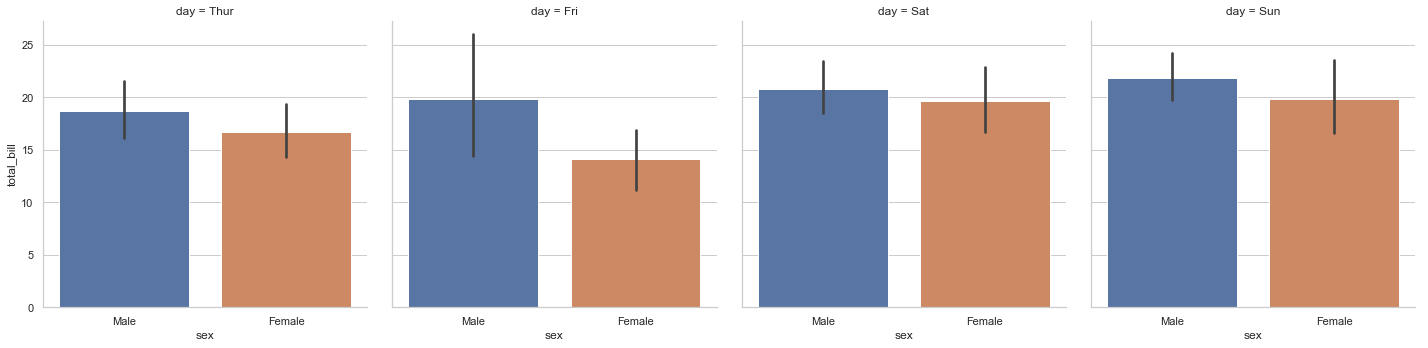

In [122]:
ax = sns.catplot(x="sex", y="total_bill", col="day", data=tips, kind="bar")

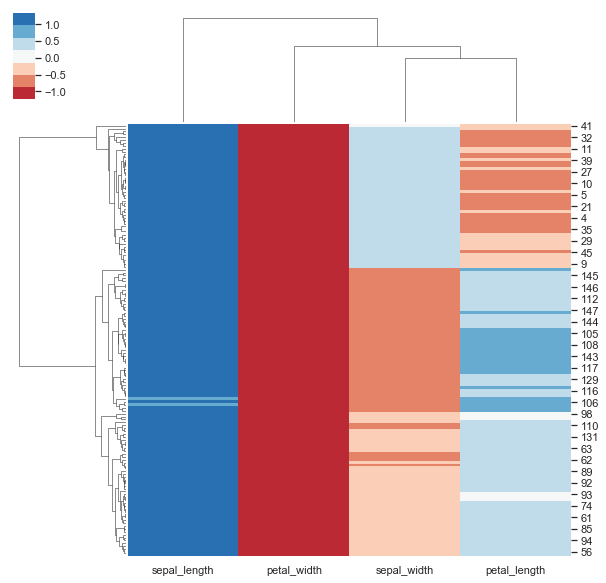

In [133]:
iris = sns.load_dataset("iris")
species = iris.pop("species")
cmap = sns.color_palette("RdBu", n_colors=7)
g = sns.clustermap(iris, z_score=0, cmap=cmap)

In [130]:
ut = dict(zip(species.unique(), "rbg"))
ut

{'setosa': 'r', 'versicolor': 'b', 'virginica': 'g'}

In [132]:
dict(zip(['a', 'b', 'c'], [1, 2, 3]))

{'a': 1, 'b': 2, 'c': 3}